# Regresja liniowa i wielomianowa

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [10]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

## Dane

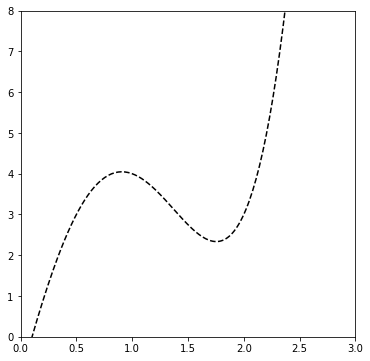

In [11]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

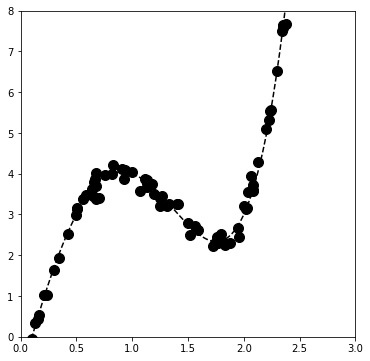

In [27]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

## Regresja liniowa i wielomianowa

* liniowa

In [13]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[ 6.95407006]
-3.61433666853
0.528412702934


* wielomian 2-stopnia

In [16]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

* wielomian 3-stopnia

In [18]:
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

* wielomian 4-stopnia

In [20]:
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

* wielomian 5-stopnia

In [21]:
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

## Która z krzywych jest najleprza?

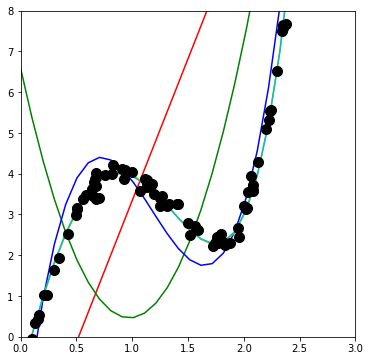

In [28]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, model1.predict(x_plot), 'r');
plt.plot(x_plot, model2.predict(x_plot), 'g');
plt.plot(x_plot, model3.predict(x_plot), 'b');
plt.plot(x_plot, model4.predict(x_plot), 'y');
plt.plot(x_plot, model5.predict(x_plot), 'c');
plt.plot(x, y, 'ok', ms=10);
plt.show()

## Parametry oceny dopasowania

In [29]:
regressors = {}
regressors['model1'] =model1
regressors['model2'] = model2
regressors['model3'] =model3
regressors['model4'] = model4
regressors['model5'] = model5

for key in regressors:
    print(key)
    regr = regressors[key]
    print("Explained variance score: {}".format( metrics.explained_variance_score(y, regr.predict(x_plot)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y, regr.predict(x_plot)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y, regr.predict(x_plot)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, regr.predict(x_plot))))
    print("R_2: {}".format(metrics.r2_score(y,regr.predict(x_plot))))

model1
Explained variance score: -7.651980063462792
Median absolute error: 24.071593627388026
Mean squared error: 1051.5213150332372
Mean absolute errors: 26.353628593264467
R_2: -19.012362407916058
model2
Explained variance score: -482.9340919019658
Median absolute error: 86.14663002186425
Mean squared error: 48849.04437000362
Mean absolute errors: 154.44781609153307
R_2: -928.6861273629853
model3
Explained variance score: -31730.00868412974
Median absolute error: 346.9610268411071
Mean squared error: 2681960.8930827607
Mean absolute errors: 1008.728705004634
R_2: -51041.59189889451
model4
Explained variance score: -287861.87605005346
Median absolute error: 602.8635135456173
Mean squared error: 22490178.208409086
Mean absolute errors: 2715.152565328082
R_2: -428027.98095420195
model5
Explained variance score: -459902.89370613405
Median absolute error: 645.9936091133759
Mean squared error: 35184371.69395027
Mean absolute errors: 3320.8748396091464
R_2: -669621.5624412567
